In [1]:
import numpy as np
import pandas as pd
import random
import networkx as nx
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
Data = pd.read_csv('/Users/mac/Desktop/Project1/df.csv')
Test = pd.read_csv('/Users/mac/Desktop/Project1/test.csv')

In [3]:
print(Data)
#24004361 rows x 2 columns

           node_1   node_2
0          540762  1912140
1          540762  1537559
2          540762  3091331
3          540762  2757277
4          540762  3237295
...           ...      ...
24004356  3547024  1075576
24004357  3547024  4549841
24004358  3547024  1135647
24004359  3547024   807274
24004360  3547024  3897045

[24004361 rows x 2 columns]


In [4]:
#source = list(Test.source)
#source
#sink = list(Test.sink)
#node_test = (source,sink)
#node_test = np.array((source,sink)))
node_test = np.array(Test[['source','sink']])
node_test

#node_train = np.array(Data[['node_1','node_2']])
#node_train

array([[3563811, 3600160],
       [2052043, 1401960],
       [4517994, 1690636],
       ...,
       [4242514, 1413468],
       [ 555531, 1290080],
       [1707829, 2373045]])

In [5]:
#Data.head()
Test.head()

,Id,source,sink
0,1,3563811,3600160
1,2,2052043,1401960
2,3,4517994,1690636
3,4,1660006,4349447
4,5,581111,1882617


In [6]:
DG = nx.from_pandas_edgelist(Data, "node_1", "node_2", create_using=nx.DiGraph())

In [7]:
TG = nx.from_pandas_edgelist(Test, "source", "sink", create_using=nx.DiGraph())

In [8]:
node_from = set(Data.node_1)
len(node_from) #19570

node_from_list = list(node_from)

In [9]:
(4867135/5)*4
#973427
#1946854
#2920281
#3893708
#4867136
19570*5

97850

In [10]:
#random nodes
random.seed(0)
num_1 = random.sample(range(0,973427),19570)
num_2 = random.sample(range(973427,1946854),19570)
num_3 = random.sample(range(1946854,2920281),19570)
num_4 = random.sample(range(2920281,3893708),19570)
num_5 = random.sample(range(3893708,4867136),19570)

In [11]:
df1 = pd.DataFrame({'from':node_from_list, "in":num_1})
df2 = pd.DataFrame({'from':node_from_list, "in":num_2})
df3 = pd.DataFrame({'from':node_from_list, "in":num_3})
df4 = pd.DataFrame({'from':node_from_list, "in":num_4})
df5 = pd.DataFrame({'from':node_from_list, "in":num_5})

df = df1.append(df2).append(df3).append(df4).append(df5)

In [12]:
df #97850 rows × 2 columns

,from,in
0,1212419,885440
1,2293763,403958
2,720901,794772
3,4784135,933488
4,2686984,441001
...,...,...
19565,2228215,3944515
19566,2064376,4609721
19567,1343481,4411437
19568,1998843,4723890


In [13]:
node_df = np.array(df[['from','in']])
node_df

array([[1212419,  885440],
       [2293763,  403958],
       [ 720901,  794772],
       ...,
       [1343481, 4411437],
       [1998843, 4723890],
       [1900542, 4768404]])

In [14]:
label = []

for node in node_df:
    a = node[0]
    b = node[1]
    
    if DG.has_edge(a,b):
        label.append(1)
    elif TG.has_edge(a,b):
        label.append(-1)
    else:
        label.append(0)

In [15]:
set(label) #0,1,没有test里面的点

{0, 1}

In [16]:
df['label'] = label
df.loc[df.label == 1]
df = df.drop(index=(df.loc[df.label == 1].index))
df #97775

,from,in,label
0,1212419,885440,0
1,2293763,403958,0
2,720901,794772,0
3,4784135,933488,0
4,2686984,441001,0
...,...,...,...
19565,2228215,3944515,0
19566,2064376,4609721,0
19567,1343481,4411437,0
19568,1998843,4723890,0


In [17]:
node_df0 = np.array(df[['from','in']])
len(node_df0)

97775

In [18]:
#Tversky Index, unbalanced and adjustable

def TverskyInd (node_a, node_b, w):
    a_out_set = set(DG.successors(node_a))
    b_out_set = set(DG.successors(node_b))
    
    if len(a_out_set | b_out_set):
        common = len(a_out_set & b_out_set)
        sub_1 = len(a_out_set - b_out_set)
        sub_2 = len(b_out_set - a_out_set)
        index = common / (common + w*sub_1 + (1-w)*sub_2)
        return index
    else:
        return -1


In [19]:
w = 0.75 #the weight
Sim = []

for node in node_df0:
    node_a = node[0]
    node_b = node[1]
    temp = TverskyInd (node_a, node_b, w)
    Sim.append(temp)

In [20]:
len(set(Sim))

186

In [21]:
Sim_np = np.array(Sim)
len(Sim_np[Sim_np==0]) #97588
len(Sim_np[Sim_np>0]) #187

187

In [22]:
#Jaccard Index Sim

def CaculateSim (node_a, node_b):
    a_in_set = set(DG.predecessors(node_a))
    a_out_set = set(DG.successors(node_a))
    
    b_in_set = set(DG.predecessors(node_b))
    b_out_set = set(DG.successors(node_b))
    
    a_b_all = set(a_in_set | a_out_set | b_in_set | b_out_set)
    s1 = len(a_in_set & b_in_set)
    s2 = len(a_out_set & b_out_set)
    s3 = len(a_in_set & b_out_set)
    s4 = len(a_out_set & b_in_set)
    a_b_same = s1+s2+s3+s4
    
    if len(a_b_all):
        sim = a_b_same / (2*len(a_b_all))
        return sim
    else:
        return -1

In [23]:
Sim_ja = []

for node in node_df0:
    node_a = node[0]
    node_b = node[1]
    temp = CaculateSim (node_a, node_b)
    Sim_ja.append(temp)

In [24]:
ja = np.array(Sim_ja)
len(ja[ja == 0]) #84249
#len(ja[ja > 0]) #13526
#len(ja[ja < 0]) #0

84249

In [25]:
# Ath is the authority value of node

ath = []

for node in node_df0:
    node_a = node[0]
    node_b = node[1]
    
    pre = set(DG.predecessors(node_b))
    ath.append(len(pre))  

In [26]:
len(ath)

97775

In [27]:
hub = []

for node in node_df0:
    node_a = node[0]
    node_b = node[1]
    
    suc = set(DG.successors(node_a))
    hub.append(len(suc))

In [28]:
len(hub)

97775

In [29]:
max(ath)#2002
max(hub)#509445

509445

In [30]:
ath_adj = np.array(ath).astype(float)/2002
hub_adj = np.array(hub).astype(float)/10000

In [31]:
min(ath_adj) #0.0004995004995004995
min(hub_adj) #0.0001

0.0001

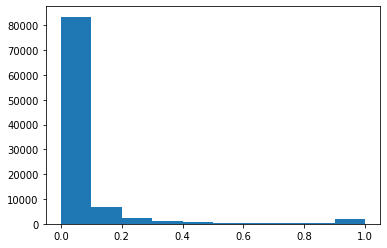

In [32]:
hub_adj[hub_adj>1] = 1

plt.hist(hub_adj)
plt.show()

In [33]:
comb = pd.DataFrame({'sim':ja, 'ath': ath_adj, 'hub':hub_adj})
comb[comb['sim'] > 0]

,sim,ath,hub
0,0.000704,0.000500,0.0695
16,0.000755,0.000500,0.1320
22,0.000994,0.020480,0.0067
24,0.000935,0.004496,0.1026
27,0.000242,0.001998,1.0000
...,...,...,...
97731,0.000087,0.000500,1.0000
97735,0.021739,0.001499,0.0021
97738,0.006135,0.008991,0.0141
97761,0.003378,0.039960,0.0337


In [34]:
value = np.array(comb[['sim','ath','hub']])
value.shape[0]

97775

In [35]:
prob = []

for node in value:
    sim = node[0]
    ath = node[1]
    hub = node[2]
    temp = (sim + ath + hub)*100
    
    prob.append(temp)

In [36]:
sum(prob)/len(prob)

7.238254792259355

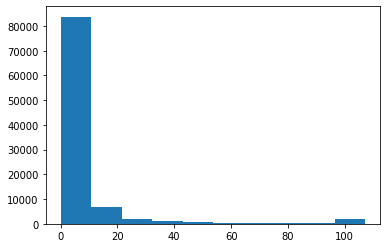

In [37]:
plt.hist(prob)
plt.show()

In [38]:
prob_adj = np.array(prob)
len(prob_adj[prob_adj<0.35]) #11341

11341

In [39]:
#df['pro'] = prob_adj
df

,from,in,label
0,1212419,885440,0
1,2293763,403958,0
2,720901,794772,0
3,4784135,933488,0
4,2686984,441001,0
...,...,...,...
19565,2228215,3944515,0
19566,2064376,4609721,0
19567,1343481,4411437,0
19568,1998843,4723890,0


In [40]:
#a = list(range(0,97775))
df.index = range(0,97775)
df

,from,in,label
0,1212419,885440,0
1,2293763,403958,0
2,720901,794772,0
3,4784135,933488,0
4,2686984,441001,0
...,...,...,...
97770,2228215,3944515,0
97771,2064376,4609721,0
97772,1343481,4411437,0
97773,1998843,4723890,0


In [41]:
#random.seed(912)
#indx = random.sample(range(0,97775),2000)

In [42]:
df.to_csv('/Users/mac/Desktop/Project1/negative.csv', index = False, header = True)

In [43]:
nage = pd.read_csv('/Users/mac/Desktop/Project1/negative.csv')
nage

,from,in,label
0,1212419,885440,0
1,2293763,403958,0
2,720901,794772,0
3,4784135,933488,0
4,2686984,441001,0
...,...,...,...
97770,2228215,3944515,0
97771,2064376,4609721,0
97772,1343481,4411437,0
97773,1998843,4723890,0


In [69]:
random.seed(912)
indx = random.sample(range(0,97775),2500)
nage_sub = df.loc[indx]
nage_sub

,from,in,label
68990,4244384,3140557,0
97162,3243032,4241080,0
40713,789124,2786390,0
24732,2335227,1612408,0
73405,1532016,3696130,0
...,...,...,...
52985,4086455,2011407,0
72825,3464362,3048234,0
35918,3795799,1714468,0
72818,3595427,3381548,0


In [45]:
random.seed(912)
indx = random.sample(range(0,24004360),6000)

In [46]:
data = np.array(Data[['node_1','node_2']])
data

array([[ 540762, 1912140],
       [ 540762, 1537559],
       [ 540762, 3091331],
       ...,
       [3547024, 1135647],
       [3547024,  807274],
       [3547024, 3897045]])

In [47]:
indx2 = []

for i in indx:
    node_a = Data.loc[i].node_1
    node_b = Data.loc[i].node_2
    a = DG.in_degree(node_a) -1
    b = DG.out_degree(node_a) -1
    c = DG.in_degree(node_b) -1
    d = DG.out_degree(node_b) -1
    
    if a & b & c & d:
        indx2.append(i)

In [48]:
random.seed(912)
indx3 = random.sample(indx2,2000)

In [49]:
posi_sub = Data.loc[indx3]
posi_sub['label'] = 1
posi_sub.columns = ['from','in','label']
posi_sub #1967169
data_part = Data.drop(index=Data.loc[indx3].index)
data_part #24002361 rows × 2 columns

,node_1,node_2
0,540762,1912140
1,540762,1537559
2,540762,3091331
3,540762,2757277
4,540762,3237295
...,...,...
24004356,3547024,1075576
24004357,3547024,4549841
24004358,3547024,1135647
24004359,3547024,807274


In [50]:
posi_sub

,from,in,label
21926351,2893327,4331696,1
9861735,455376,4697286,1
11137021,544230,521586,1
22630848,4238001,1870577,1
15895682,1249227,1024872,1
...,...,...,...
20957257,295156,4526614,1
20486120,593740,2864121,1
3556298,1580988,1955718,1
1988639,2727581,3905749,1


In [70]:
sample = posi_sub.append(nage_sub)
sample

,from,in,label
21926351,2893327,4331696,1
9861735,455376,4697286,1
11137021,544230,521586,1
22630848,4238001,1870577,1
15895682,1249227,1024872,1
...,...,...,...
52985,4086455,2011407,0
72825,3464362,3048234,0
35918,3795799,1714468,0
72818,3595427,3381548,0


In [71]:
sample.to_csv('/Users/mac/Desktop/Project1/train_sample.csv', index = False, header = True)

In [53]:
data_part.to_csv('/Users/mac/Desktop/Project1/partial.csv', index = False, header = True)